<a href="https://colab.research.google.com/github/davoodwadi/davoodwadi.github.io/blob/main/SVD_movielens100k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#| eval: false

In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
!wget 'https://files.grouplens.org/datasets/movielens/ml-100k.zip' './'

--2023-09-25 12:22:25--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  9.91MB/s    in 0.5s    

2023-09-25 12:22:26 (9.91 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

--2023-09-25 12:22:26--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2023-09-25 12:22:26--
Total wall clock time: 1.0s
Downloaded: 1 files, 4.7M in 0.5s (9.91 MB/s)


In [3]:
!unzip './ml-100k.zip'

Archive:  ./ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [4]:
movie_columns = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western' ]
movies = pd.read_csv('./ml-100k/u.item', sep='|', encoding='latin-1', names = movie_columns)
movies

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
genres = movies.columns[6:].to_numpy()
def create_genre(row):
  genre_int = row[6:]
  index = np.where(genre_int==1)
  # return genres[index[0]]
  return ' '.join(genres[index[0]])

In [6]:
movies['Genre'] = movies.apply(create_genre, axis=1)
movies

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Animation Children's Comedy
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,Action Adventure Thriller
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Action Comedy Drama
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Crime Drama Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Drama
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,Romance Thriller
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Drama Romance
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Comedy


In [7]:
users = pd.read_csv('./ml-100k/u.user', sep='|', encoding='latin-1', names = ['user id' , 'age' , 'gender' , 'occupation' , 'zip code'])
users

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [8]:
ratings = pd.read_csv('./ml-100k/u.data', sep='\t', names = ['uid', 'mid', 'rating', 'timestamp'])
ratings

,uid,mid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [9]:
ratings.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

# SVD

In [10]:
a_pivot = pd.pivot_table(ratings, values = 'rating', columns = 'mid', index = 'uid', fill_value = -1)
a_pivot

mid,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
uid,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,-1,-1,-1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,4,3,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
940,-1,-1,-1,2,-1,-1,4,5,3,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
941,5,-1,-1,-1,-1,-1,4,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [11]:
a = a_pivot.to_numpy()
a = torch.tensor(a).float()
a

tensor([[ 5.,  3.,  4.,  ..., -1., -1., -1.],
        [ 4., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [ 5., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1.,  5., -1.,  ..., -1., -1., -1.]])

In [12]:
a.numel()

1586126

In [13]:
(a==(-1)).sum()

tensor(1486126)

In [14]:
a.shape

torch.Size([943, 1682])

In [15]:
k = 20
u = torch.randn(a.shape[0], k, requires_grad=True)
v = torch.randn(k, a.shape[1],  requires_grad=True)
u.shape, v.shape

(torch.Size([943, 20]), torch.Size([20, 1682]))

In [16]:
optim = torch.optim.SGD([u, v], lr = 0.5)
loss_fn = torch.nn.MSELoss()
epoch = 1000
mask = a >= 0
for ep in range(epoch):
  a_hat = u @ v
  loss = loss_fn(a_hat[mask], a[mask])
  loss.backward()
  optim.step()
  optim.zero_grad()
  if ep%100==0:
    print(f'epoch {ep}: rmse loss {loss.detach().sqrt().item():0.4f}')

epoch 0: rmse loss 5.8354
epoch 100: rmse loss 4.8373
epoch 200: rmse loss 4.3531
epoch 300: rmse loss 4.0140
epoch 400: rmse loss 3.6677
epoch 500: rmse loss 3.2592
epoch 600: rmse loss 2.8526
epoch 700: rmse loss 2.5214
epoch 800: rmse loss 2.2663
epoch 900: rmse loss 2.0665


## activeSGD

In [17]:
!wget https://raw.githubusercontent.com/davoodwadi/active-lr/main/optimizers/ActiveSGD.py

--2023-09-25 12:23:21--  https://raw.githubusercontent.com/davoodwadi/active-lr/main/optimizers/ActiveSGD.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4148 (4.1K) [text/plain]
Saving to: ‘ActiveSGD.py’

ActiveSGD.py        100%[===================>]   4.05K  --.-KB/s    in 0s      

2023-09-25 12:23:21 (43.4 MB/s) - ‘ActiveSGD.py’ saved [4148/4148]



In [18]:
from ActiveSGD import ActiveSGD

In [19]:
k = 200
u = torch.randn(a.shape[0], k, requires_grad=True)
v = torch.randn(k, a.shape[1],  requires_grad=True)
u.shape, v.shape

(torch.Size([943, 200]), torch.Size([200, 1682]))

In [20]:
stepSize = 1
optim = ActiveSGD([u, v], stepSize=stepSize, lr = 0.5)
loss_fn = torch.nn.MSELoss()
epoch = 1000
mask = a >= 0
for ep in range(epoch):
  a_hat = u @ v
  loss = loss_fn(a_hat[mask], a[mask])
  loss.backward()
  optim.step()
  optim.zero_grad()
  if ep%100==0:
    print(f'epoch {ep}: rmse loss {loss.detach().sqrt().item():0.4f}')


epoch 0: rmse loss 14.6202
epoch 100: rmse loss 0.3853
epoch 200: rmse loss 0.1878
epoch 300: rmse loss 0.1045
epoch 400: rmse loss 0.0629
epoch 500: rmse loss 0.0414
epoch 600: rmse loss 0.0290
epoch 700: rmse loss 0.0211
epoch 800: rmse loss 0.0159
epoch 900: rmse loss 0.0123


In [21]:
with torch.no_grad():
  a_hat = u @ v
a_hat

tensor([[ 5.0043e+00,  2.9998e+00,  4.0002e+00,  ..., -2.2038e+00,
          4.1306e-03,  6.7976e+00],
        [ 3.9989e+00,  4.1398e+00, -7.4116e-02,  ..., -5.7194e+00,
          9.1199e+00, -1.6044e+01],
        [ 4.5649e+00, -1.6729e+01, -3.5799e+00,  ...,  1.4431e+01,
         -2.1896e-01, -9.5088e+00],
        ...,
        [ 4.9977e+00, -9.2435e-01,  2.1641e+01,  ..., -1.7008e+01,
          8.9838e+00, -1.4964e+01],
        [ 4.7857e+00, -6.4135e+00,  5.1219e+00,  ...,  1.3930e+00,
         -3.8581e+00, -1.4237e+01],
        [ 6.6980e+00,  5.0004e+00,  5.6941e+00,  ...,  1.2654e+01,
          1.2119e+01,  1.2553e+01]])

# Get recommendations

In [22]:
def watched(uid):
  watched = ratings[ratings.uid==uid]
  ret = watched.mid.to_numpy()
  ret = movies[movies['movie id'].isin(ret)]['movie title']
  return ret

def watched_liked(uid, threshold=3.5):
  watched = ratings[(ratings.uid==uid) & (ratings.rating>threshold)]
  ret = watched.mid.to_numpy()
  ret = movies[movies['movie id'].isin(ret)]['movie title']
  return ret
def not_watched(uid):
  watched = ratings[(ratings.uid==uid)]
  ret = watched.mid.to_numpy()
  ret = movies[~movies['movie id'].isin(ret)]['movie title']
  return ret


In [23]:
uid = 1

In [24]:
watched_liked(uid)

0                                       Toy Story (1995)
2                                      Four Rooms (1995)
5      Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                  Twelve Monkeys (1995)
8                                Dead Man Walking (1995)
                             ...                        
264                     Hunt for Red October, The (1990)
266                                              unknown
267                                   Chasing Amy (1997)
268                               Full Monty, The (1997)
269                                       Gattaca (1997)
Name: movie title, Length: 163, dtype: object

In [25]:
watched(uid)

0              Toy Story (1995)
1              GoldenEye (1995)
2             Four Rooms (1995)
3             Get Shorty (1995)
4                Copycat (1995)
                 ...           
267          Chasing Amy (1997)
268      Full Monty, The (1997)
269              Gattaca (1997)
270    Starship Troopers (1997)
271    Good Will Hunting (1997)
Name: movie title, Length: 272, dtype: object

In [26]:
nw = not_watched(uid)
nw

272                                   Heat (1995)
273                                Sabrina (1995)
274                  Sense and Sensibility (1995)
275                      Leaving Las Vegas (1995)
276                            Restoration (1995)
                          ...                    
1677                            Mat' i syn (1997)
1678                             B. Monkey (1998)
1679                         Sliding Doors (1998)
1680                          You So Crazy (1994)
1681    Scream of Stone (Schrei aus Stein) (1991)
Name: movie title, Length: 1410, dtype: object

In [27]:
nw.index.to_numpy()

array([ 272,  273,  274, ..., 1679, 1680, 1681])

In [28]:
prediction_df = pd.DataFrame(a_hat, index=range(1, a_hat.shape[0]+1), columns=range(1, a_hat.shape[1]+1))
prediction_df

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5.004304,2.999811,4.000242,3.000716,3.000912,4.999877,4.000716,0.998199,4.999877,2.999701,...,2.677487,8.868751,-2.484020,7.437770,1.646107,-2.040292,2.632884,-2.203806,0.004131,6.797606
2,3.998886,4.139823,-0.074116,5.091535,-3.209011,0.062505,9.377804,12.178069,7.282120,2.000203,...,-2.581928,0.724032,-15.948099,-11.589712,6.701364,-9.218519,24.118979,-5.719369,9.119939,-16.043646
3,4.564934,-16.729370,-3.579922,4.843268,14.048830,-0.669037,3.204421,-12.504386,6.343798,9.640670,...,3.225056,-15.500827,13.296917,4.111541,3.764230,-3.893084,6.357164,14.431271,-0.218964,-9.508836
4,7.609192,10.523496,-2.323120,-1.952215,7.184854,-18.966362,-0.841128,9.049640,-5.000579,9.116615,...,20.477491,-5.735116,13.504451,1.787438,-16.389277,17.946774,-15.046497,7.390345,-11.824745,-0.435370
5,3.996701,3.000138,-6.053336,9.426641,8.825453,-0.675734,2.194716,2.264828,7.741161,-3.040463,...,1.181675,-9.759852,-5.752519,-7.259325,6.817764,4.865910,8.720139,-1.766573,11.869007,-10.755214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.201188,12.854153,12.797200,5.344156,-2.537490,-18.122219,4.691484,-2.372149,5.000305,3.658480,...,13.305645,-8.472819,25.497574,-0.093947,-16.408646,4.364131,1.032204,24.839842,-24.223797,-2.213850
940,1.058385,0.455055,1.329990,1.999800,5.846478,-5.103072,3.997473,5.000207,3.000424,-14.281948,...,23.090666,-7.207386,-2.602040,1.720446,-6.536170,13.851688,32.706913,-3.953150,5.664157,-3.137197
941,4.997713,-0.924346,21.641083,9.770977,-7.051800,3.512075,3.999628,6.511045,4.752253,2.856754,...,-11.042938,-2.952090,-2.219363,3.364909,8.664539,6.179554,-2.757024,-17.007853,8.983795,-14.963533
942,4.785673,-6.413533,5.121909,1.225757,-5.503317,5.218601,1.684648,1.952597,0.761365,-6.901558,...,-16.204861,12.844807,6.803994,27.892262,3.549176,7.932891,-9.075477,1.393004,-3.858129,-14.237255


In [29]:
predicted = pd.merge(movies[['movie id', 'movie title', 'Genre']], ratings[ratings.uid==uid][['mid', 'rating']], left_on='movie id', right_on='mid', how='left').drop('mid', axis=1)
predicted = predicted.set_index('movie id')
predicted['predicted_rating'] = prediction_df.loc[uid] # choose the user
predicted['rating_count'] = ratings.groupby('mid').count()['rating'] # set the number of ratings as measure for popularity
predicted

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
1,Toy Story (1995),Animation Children's Comedy,5.0,5.004304,452
2,GoldenEye (1995),Action Adventure Thriller,3.0,2.999811,131
3,Four Rooms (1995),Thriller,4.0,4.000242,90
4,Get Shorty (1995),Action Comedy Drama,3.0,3.000716,209
5,Copycat (1995),Crime Drama Thriller,3.0,3.000912,86
...,...,...,...,...,...
1678,Mat' i syn (1997),Drama,NaN,-2.040292,1
1679,B. Monkey (1998),Romance Thriller,NaN,2.632884,1
1680,Sliding Doors (1998),Drama Romance,NaN,-2.203806,1


In [30]:
min_rev = 100
popular_movies = predicted[predicted.rating_count>min_rev]
popular_movies

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
1,Toy Story (1995),Animation Children's Comedy,5.0,5.004304,452
2,GoldenEye (1995),Action Adventure Thriller,3.0,2.999811,131
4,Get Shorty (1995),Action Comedy Drama,3.0,3.000716,209
7,Twelve Monkeys (1995),Drama Sci-Fi,4.0,4.000716,392
8,Babe (1995),Children's Comedy Drama,1.0,0.998199,219
...,...,...,...,...,...
926,Down Periscope (1996),Comedy,NaN,7.610969,101
928,"Craft, The (1996)",Drama Horror,NaN,0.913853,104
1016,Con Air (1997),Action Adventure Thriller,NaN,9.294837,137


In [31]:
popular_movies_like = popular_movies[popular_movies.predicted_rating>=4]
popular_movies_like

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
1,Toy Story (1995),Animation Children's Comedy,5.0,5.004304,452
7,Twelve Monkeys (1995),Drama Sci-Fi,4.0,4.000716,392
9,Dead Man Walking (1995),Drama,5.0,4.999877,299
12,"Usual Suspects, The (1995)",Crime Thriller,5.0,5.000423,267
13,Mighty Aphrodite (1995),Comedy,5.0,4.999995,184
...,...,...,...,...,...
895,Scream 2 (1997),Horror Thriller,NaN,4.546927,106
926,Down Periscope (1996),Comedy,NaN,7.610969,101
1016,Con Air (1997),Action Adventure Thriller,NaN,9.294837,137


In [32]:
popular_movies_like[popular_movies_like.rating.isna()].sort_values(by='predicted_rating', ascending=False)

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
699,Little Women (1994),Drama,NaN,19.344744,102
1047,Multiplicity (1996),Comedy,NaN,17.834051,134
654,Chinatown (1974),Film-Noir Mystery Thriller,NaN,17.403227,147
603,Rear Window (1954),Mystery Thriller,NaN,14.505638,209
509,My Left Foot (1989),Drama,NaN,13.487984,121
432,Fantasia (1940),Animation Children's Musical,NaN,13.038412,174
879,"Peacemaker, The (1997)",Action Thriller War,NaN,12.796140,136
462,Like Water For Chocolate (Como agua para choco...,Drama Romance,NaN,12.088273,148
347,Wag the Dog (1997),Comedy Drama,NaN,10.813789,137


# Visualize embeddings

In [33]:
from sklearn.manifold import TSNE
import seaborn as sns

In [34]:
v_array = v.detach().numpy()
v_array.shape

(200, 1682)

In [35]:
tsne = TSNE(n_components=2, perplexity=40)
Xs = tsne.fit_transform(v_array.T)

In [36]:
Xs.shape

(1682, 2)

Text(0.5, 1.0, 'Movie embeddings')

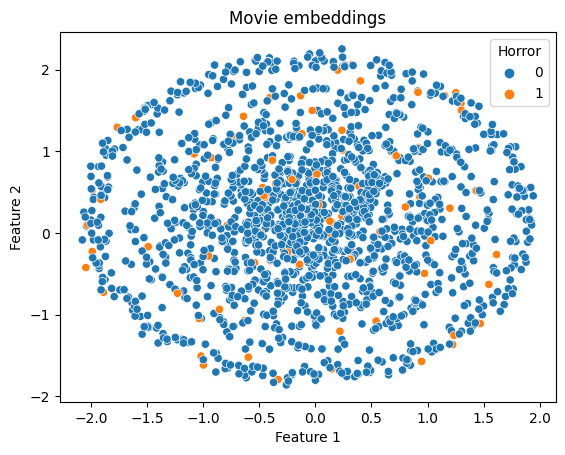

In [37]:
ax = sns.scatterplot(x=Xs[:,0], y=Xs[:,1], hue=movies.Horror)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Movie embeddings')

In [38]:
title = 'god'
predicted[predicted['movie title'].str.contains(title, case=False, regex=False)]

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
127,"Godfather, The (1972)",Action Crime Drama,5.0,4.994543,413
187,"Godfather: Part II, The (1974)",Action Crime Drama,4.0,4.000909,209
336,Playing God (1997),Crime Thriller,NaN,-0.603078,43
613,My Man Godfrey (1936),Comedy,NaN,-0.266189,27
1092,Dear God (1996),Comedy,NaN,6.974932,12
1572,Wend Kuuni (God's Gift) (1982),Drama,NaN,2.421425,1


Text(0.5, 1.0, 'Movie embeddings')

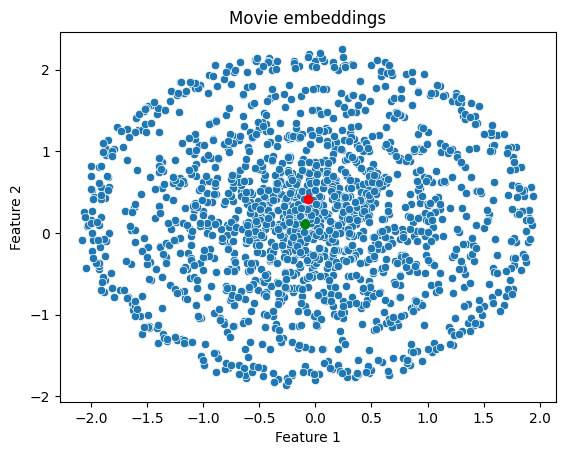

In [39]:
movie1=127
movie2=187

ax = sns.scatterplot(x=Xs[:,0], y=Xs[:,1])
ax.scatter(x = Xs[movie1-1, 0], y = Xs[movie1-1, 1], color='red') # godfather
ax.scatter(x = Xs[movie2-1, 0], y = Xs[movie2-1, 1], color='green') # goodfellas
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Movie embeddings')

In [40]:
popular_index = predicted[predicted.rating_count>300].index.to_numpy()-1
popular_index

array([  0,   6,  49,  55,  68,  78,  97,  99, 116, 120, 126, 150, 167,
       171, 172, 173, 180, 194, 203, 209, 221, 236, 256, 257, 268, 285,
       287, 293, 299, 312, 404, 747])

Text(0.5, 1.0, 'Movie embeddings')

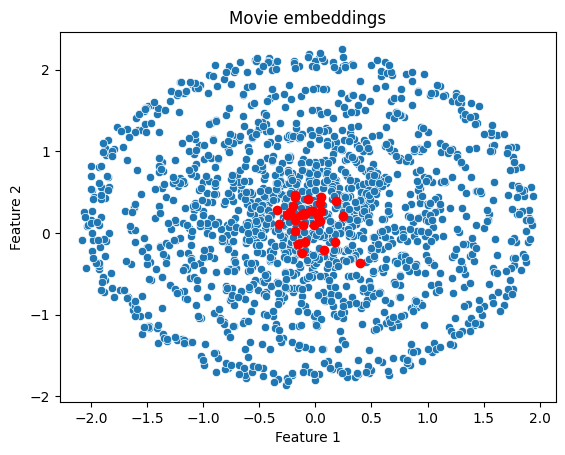

In [41]:
ax = sns.scatterplot(x=Xs[:,0], y=Xs[:,1])
ax.scatter(x = Xs[popular_index, 0], y = Xs[popular_index, 1], color='red') # godfather
# ax.scatter(x = Xs[182, 0], y = Xs[182, 1], color='green') # goodfellas
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Movie embeddings')

In [42]:
unpop_index = predicted[predicted.rating_count<2].index.to_numpy()-1
unpop_index

array([ 598,  676,  710,  813,  829,  851,  856, 1121, 1129, 1155, 1200,
       1234, 1235, 1308, 1309, 1319, 1324, 1328, 1338, 1339, 1340, 1342,
       1347, 1348, 1351, 1362, 1363, 1365, 1372, 1413, 1446, 1451, 1452,
       1456, 1457, 1459, 1460, 1475, 1481, 1485, 1491, 1492, 1493, 1497,
       1504, 1506, 1509, 1514, 1519, 1524, 1525, 1532, 1535, 1542, 1545,
       1547, 1556, 1558, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567,
       1568, 1569, 1570, 1571, 1573, 1574, 1575, 1576, 1578, 1579, 1580,
       1581, 1582, 1583, 1585, 1586, 1592, 1594, 1595, 1598, 1600, 1602,
       1603, 1605, 1612, 1613, 1615, 1617, 1618, 1620, 1623, 1624, 1625,
       1626, 1629, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1639, 1640,
       1644, 1646, 1647, 1648, 1649, 1650, 1652, 1653, 1654, 1656, 1658,
       1659, 1660, 1662, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1672,
       1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681])

Text(0.5, 1.0, 'Movie embeddings')

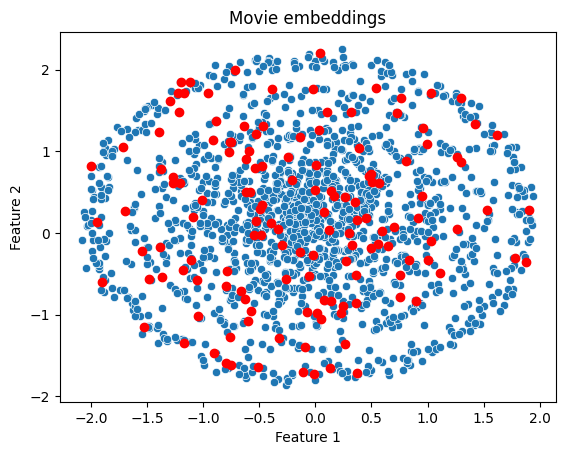

In [43]:
ax = sns.scatterplot(x=Xs[:,0], y=Xs[:,1])
ax.scatter(x = Xs[unpop_index, 0], y = Xs[unpop_index, 1], color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Movie embeddings')

In [44]:
predicted.iloc[Xs[:,0]<-1.9]

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
17,From Dusk Till Dawn (1996),Action Comedy Crime Horror Thriller,3.0,2.999887,92
60,Three Colors: Blue (1993),Drama,5.0,4.999560,64
68,"Crow, The (1994)",Action Romance Thriller,4.0,3.999771,134
207,Cyrano de Bergerac (1990),Action Drama Romance,5.0,4.999604,66
236,Citizen Ruth (1996),Comedy Drama,4.0,3.999710,45
306,"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",Drama Romance,NaN,12.381192,96
424,Children of the Corn: The Gathering (1996),Horror,NaN,-2.154618,19
430,Duck Soup (1933),Comedy War,NaN,4.534112,93
437,Amityville 1992: It's About Time (1992),Horror,NaN,8.218152,5


Text(0.5, 1.0, 'Movie embeddings')

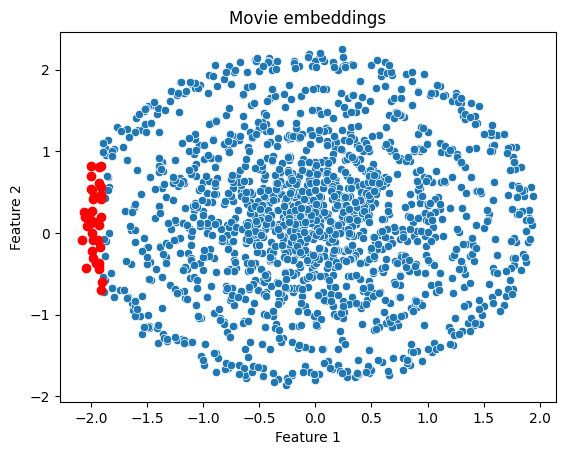

In [45]:
ax = sns.scatterplot(x=Xs[:,0], y=Xs[:,1])
ax.scatter(x = Xs[Xs[:,0]<-1.9,0], y = Xs[Xs[:,0]<-1.9,1], color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Movie embeddings')

In [46]:
predicted.iloc[Xs[:,0]>1.9]

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
680,Kull the Conqueror (1997),Action Adventure,NaN,10.752586,34
693,Casino (1995),Drama,NaN,5.206984,91
701,"Wonderful, Horrible Life of Leni Riefenstahl, ...",Documentary,NaN,-4.857945,10
711,"Substance of Fire, The (1996)",Drama,NaN,-12.256781,1
783,Milk Money (1994),Comedy Romance,NaN,-3.346568,37
785,Only You (1994),Comedy Romance,NaN,-4.774742,39
901,Mr. Magoo (1997),Comedy,NaN,10.760063,12
1248,Blink (1994),Thriller,NaN,-5.151400,19


In [47]:
most_watched = predicted[predicted.rating_count>390].index.to_numpy()-1
most_watched

array([  0,   6,  49,  55,  99, 120, 126, 173, 180, 257, 285, 287, 293,
       299])

In [48]:
titles = predicted[predicted.rating_count>390]['movie title'].tolist()
titles

['Toy Story (1995)',
 'Twelve Monkeys (1995)',
 'Star Wars (1977)',
 'Pulp Fiction (1994)',
 'Fargo (1996)',
 'Independence Day (ID4) (1996)',
 'Godfather, The (1972)',
 'Raiders of the Lost Ark (1981)',
 'Return of the Jedi (1983)',
 'Contact (1997)',
 'English Patient, The (1996)',
 'Scream (1996)',
 'Liar Liar (1997)',
 'Air Force One (1997)']

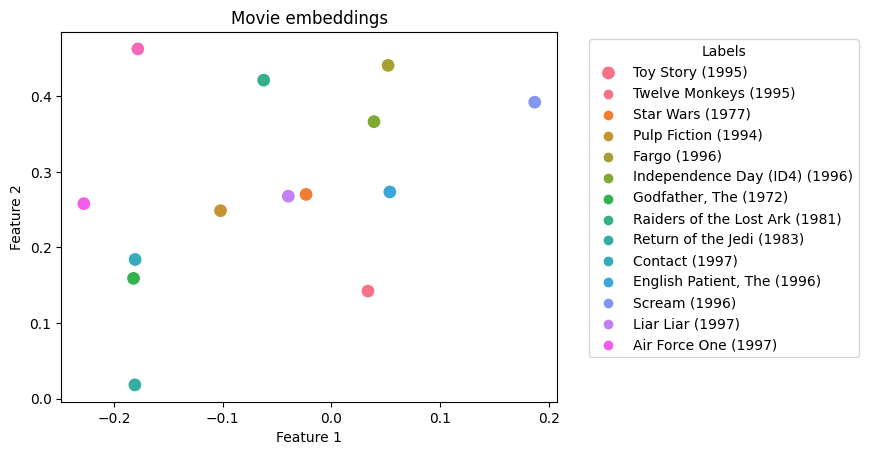

In [49]:
import matplotlib.pyplot as plt
ax = sns.scatterplot(x=Xs[most_watched,0], y=Xs[most_watched,1], hue=titles, s=100)
# ax.scatter(x = Xs[Xs[:,0]<-1.9,0], y = Xs[Xs[:,0]<-1.9,1], color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Movie embeddings')
# plt.legend(loc='lower right')
legend = plt.legend(title='Labels', loc='upper left', labels=titles, bbox_to_anchor=(1.05, 1))


In [50]:
# Calculate r (radial distance)
r = np.sqrt((Xs**2).sum(-1))
r.shape

(1682,)

In [51]:
# Calculate θ (polar angle) in radians
theta_rad = np.arctan2(Xs[:,1], Xs[:,0])
theta_rad

array([ 1.338102  , -2.5759    ,  2.6575549 , ...,  1.0303308 ,
        0.58894116,  1.3571696 ], dtype=float32)

Text(0.5, 1.0, 'Movie embeddings')

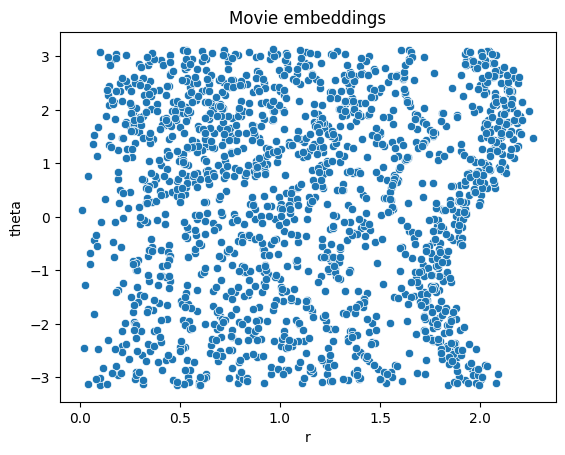

In [52]:
ax = sns.scatterplot(x=r, y=theta_rad)
ax.set_xlabel('r')
ax.set_ylabel('theta')
ax.set_title('Movie embeddings')

Text(0.5, 1.0, 'Movie embeddings')

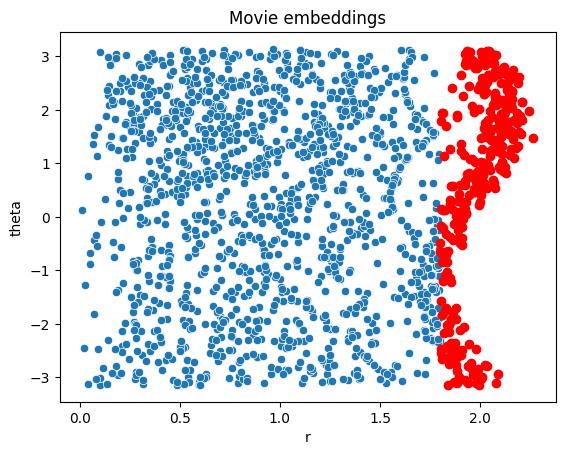

In [53]:
ax = sns.scatterplot(x=r, y=theta_rad)
ax.scatter(x = r[r>1.8], y = theta_rad[r>1.8], color='red')
ax.set_xlabel('r')
ax.set_ylabel('theta')
ax.set_title('Movie embeddings')

In [54]:
predicted.iloc[(r>1.8)&(theta_rad>3)]

,movie title,Genre,rating,predicted_rating,rating_count
movie id,,,,,
60,Three Colors: Blue (1993),Drama,5.0,4.999560,64
207,Cyrano de Bergerac (1990),Action Drama Romance,5.0,4.999604,66
424,Children of the Corn: The Gathering (1996),Horror,NaN,-2.154618,19
583,Romeo Is Bleeding (1993),Crime Thriller,NaN,4.346161,37
722,Nine Months (1995),Comedy,NaN,0.738387,58
768,Casper (1995),Adventure Children's,NaN,-17.041201,52
789,Swimming with Sharks (1995),Comedy Drama,NaN,-0.200173,47
1276,Sunset Park (1996),Drama,NaN,6.947076,8
1358,The Deadly Cure (1996),Action,NaN,-0.213771,2
